In [162]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

import statsmodels
from statsmodels.tsa import stattools
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

import warnings
warnings.filterwarnings('ignore')

In [135]:
import os
from datetime import datetime
import pandas_datareader.data as web

In [136]:
print(statsmodels.__version__)

0.11.0


# **Self-correlation**

### **1. White-noise**

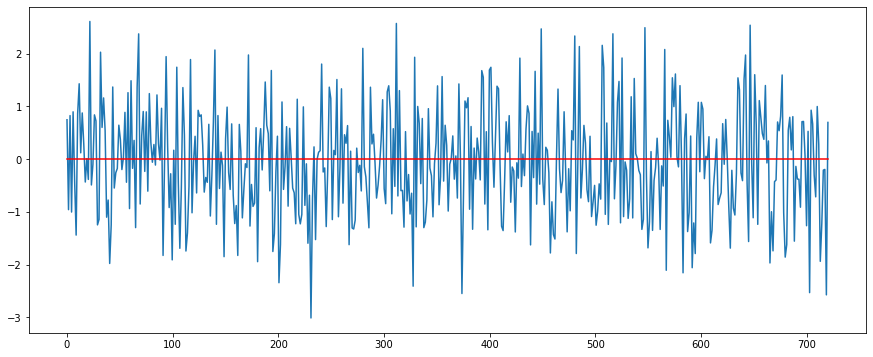

In [4]:
plt.figure(figsize = (15, 6))

grid = np.linspace(0, 720, 500)
noise = np.random.randn(500)
result_curve =  noise
plt.plot(grid, result_curve)

y_0 = np.zeros(500)
plt.plot(grid, y_0, color = 'red')

plt.show()

**ACF & PACF**

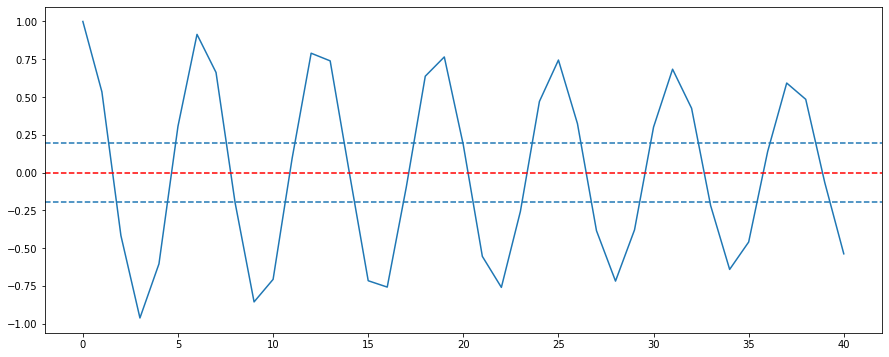

In [44]:
plt.figure(figsize = (15, 6))

acf_result = stattools.acf(result_curve)
plt.plot(acf_result)
plt.axhline(y = 0,linestyle='--', color = 'red')
plt.axhline(y = -1.96/np.sqrt(len(result_curve)),linestyle='--')
plt.axhline(y = 1.96/np.sqrt(len(result_curve)),linestyle='--')

plt.show()

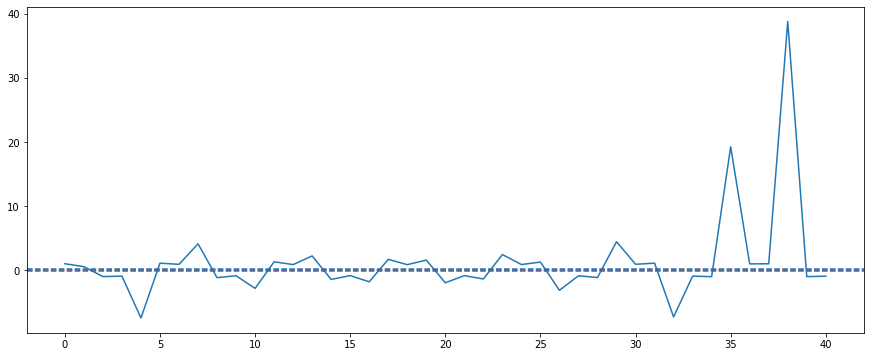

In [45]:
plt.figure(figsize = (15, 6))

pacf_result = stattools.pacf(result_curve)
plt.plot(pacf_result)
plt.axhline(y = 0,linestyle='--', color = 'red')
plt.axhline(y = -1.96/np.sqrt(len(result_curve)),linestyle='--')
plt.axhline(y = 1.96/np.sqrt(len(result_curve)),linestyle='--')

plt.show()

### **2. Sine**

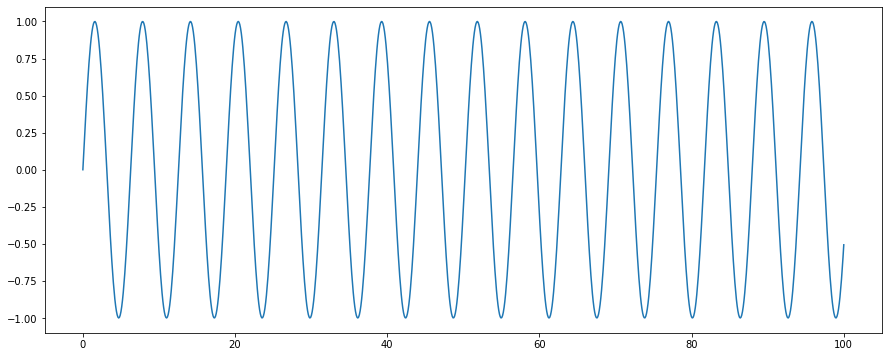

In [6]:
plt.figure(figsize = (15, 6))

grid = np.linspace(0, 100, 1000)
sin5 = np.sin(grid)
result_curve = sin5 
plt.plot(grid, result_curve)

plt.show()

**ACF & PACF**

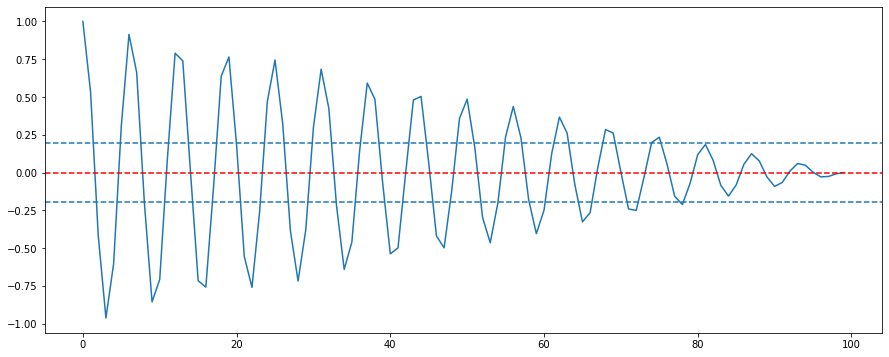

In [7]:
plt.figure(figsize = (15, 6))

grid = np.linspace(0, 100, 100)
sin5 = np.sin(grid)
result_curve = sin5 

acf_result = stattools.acf(result_curve, nlags = 100)
plt.plot(acf_result)
plt.axhline(y = 0,linestyle='--', color = 'red')
plt.axhline(y = -1.96/np.sqrt(len(result_curve)),linestyle='--')
plt.axhline(y = 1.96/np.sqrt(len(result_curve)),linestyle='--')

plt.show()

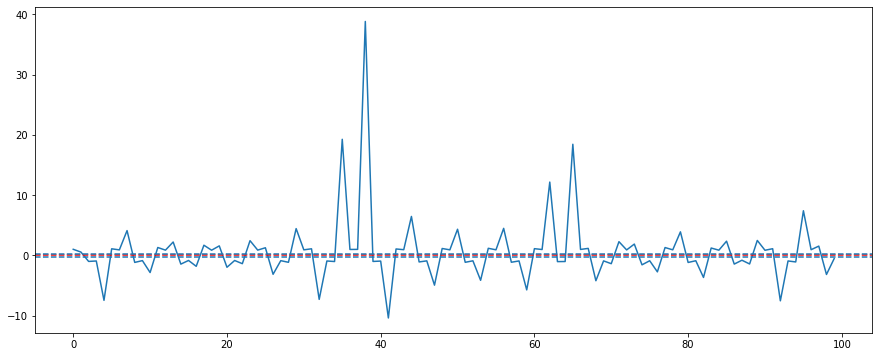

In [46]:
plt.figure(figsize = (15, 6))

grid = np.linspace(0, 100, 100)
sin5 = np.sin(grid)
result_curve = sin5 

pacf_result = stattools.pacf(result_curve, nlags = 100)
plt.plot(pacf_result)
plt.axhline(y = 0,linestyle='--', color = 'red')
plt.axhline(y = -1.96/np.sqrt(len(result_curve)),linestyle='--')
plt.axhline(y = 1.96/np.sqrt(len(result_curve)),linestyle='--')

plt.show()

### **3. Yahoo**

In [8]:
start = pd.Timestamp('2010-1-1')
end = pd.Timestamp('2013-1-27')
f = web.DataReader("F", 'yahoo', start, end)

**ACF & PACF**

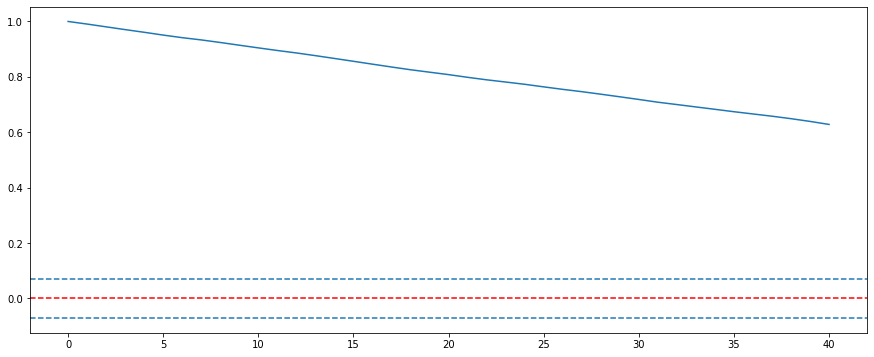

In [9]:
plt.figure(figsize = (15, 6))

acf_result = stattools.acf(f['Close'])
plt.plot(acf_result)
plt.axhline(y = 0,linestyle='--', color = 'red')
plt.axhline(y = -1.96/np.sqrt(len(f['Close'])),linestyle='--')
plt.axhline(y = 1.96/np.sqrt(len(f['Close'])),linestyle='--')

plt.show()

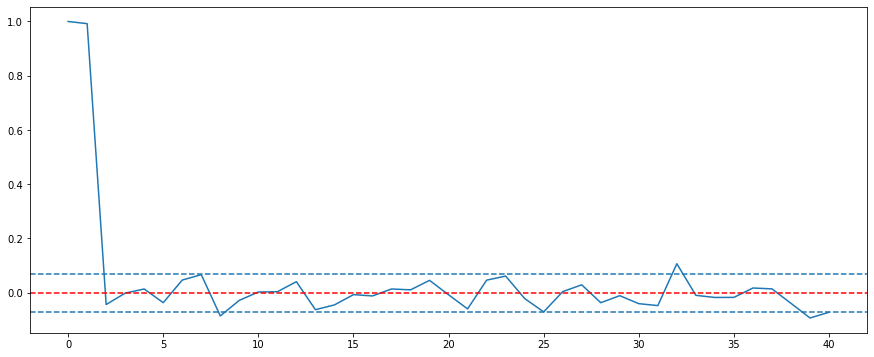

In [47]:
plt.figure(figsize = (15, 6))

pacf_result = stattools.pacf(f['Close'])
plt.plot(pacf_result)
plt.axhline(y = 0,linestyle='--', color = 'red')
plt.axhline(y = -1.96/np.sqrt(len(f['Close'])),linestyle='--')
plt.axhline(y = 1.96/np.sqrt(len(f['Close'])),linestyle='--')

plt.show()

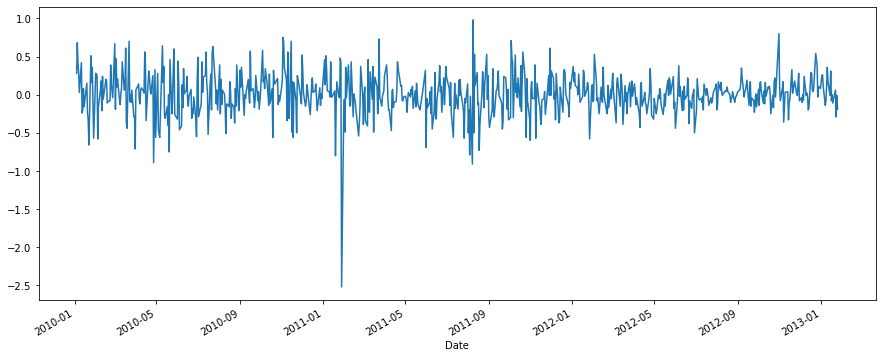

In [10]:
plt.figure(figsize = (15, 6))

diff_close = f.Close - f.Close.shift()
diff_close.dropna(inplace = True)
diff_close.plot()

plt.show()

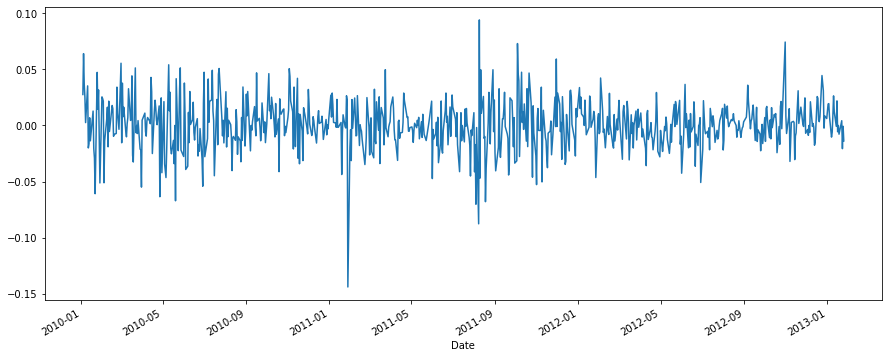

In [11]:
plt.figure(figsize = (15, 6))

log_close = np.log(f['Close'])
diff_log_close = log_close - log_close.shift()
diff_log_close.dropna(inplace = True)
diff_log_close.plot()

plt.show()

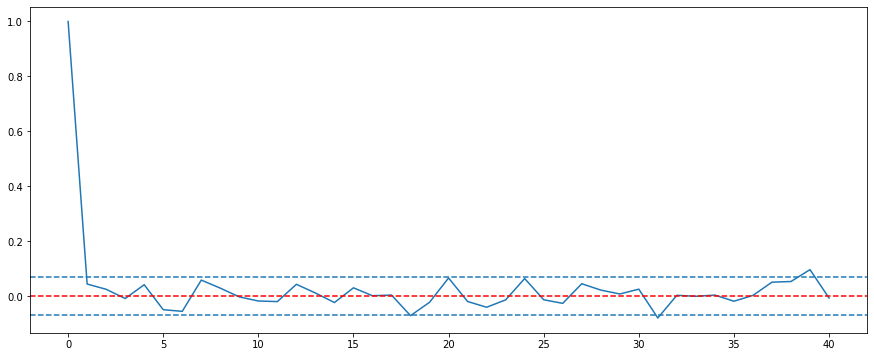

In [12]:
plt.figure(figsize = (15, 6))

acf_result = stattools.acf(diff_close)
plt.plot(acf_result)
plt.axhline(y = 0,linestyle='--', color = 'red')
plt.axhline(y = -1.96/np.sqrt(len(diff_close)),linestyle='--')
plt.axhline(y = 1.96/np.sqrt(len(diff_close)),linestyle='--')

plt.show()

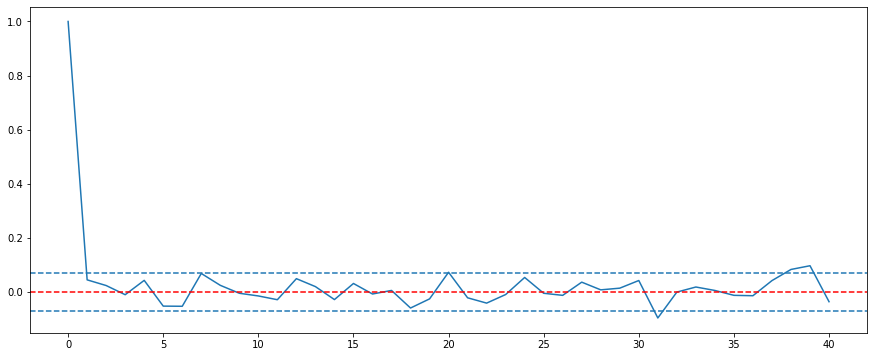

In [48]:
plt.figure(figsize = (15, 6))

pacf_result = stattools.pacf(diff_close)
plt.plot(pacf_result)
plt.axhline(y = 0,linestyle='--', color = 'red')
plt.axhline(y = -1.96/np.sqrt(len(diff_close)),linestyle='--')
plt.axhline(y = 1.96/np.sqrt(len(diff_close)),linestyle='--')

plt.show()

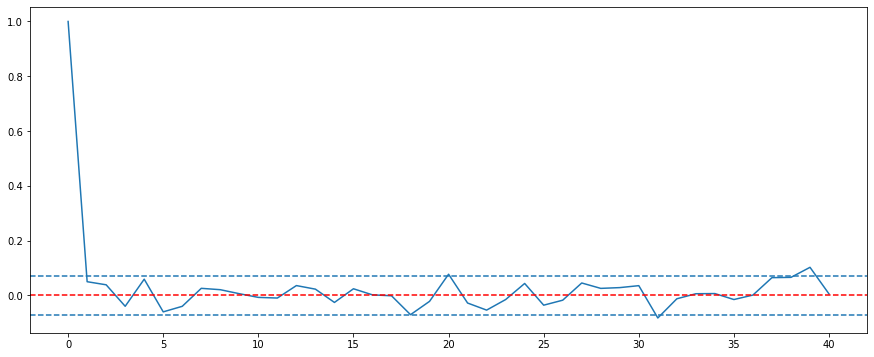

In [13]:
plt.figure(figsize = (15, 6))

acf_result = stattools.acf(diff_log_close)
plt.plot(acf_result)
plt.axhline(y = 0,linestyle='--', color = 'red')
plt.axhline(y = -1.96/np.sqrt(len(diff_log_close)),linestyle='--')
plt.axhline(y = 1.96/np.sqrt(len(diff_log_close)),linestyle='--')

plt.show()

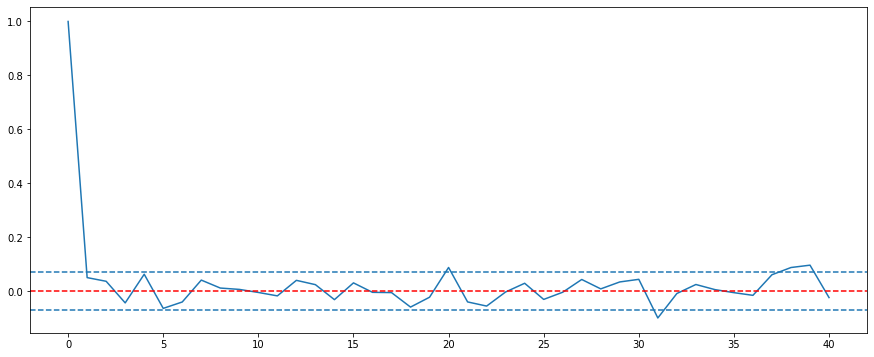

In [49]:
plt.figure(figsize = (15, 6))

pacf_result = stattools.pacf(diff_log_close)
plt.plot(pacf_result)
plt.axhline(y = 0,linestyle='--', color = 'red')
plt.axhline(y = -1.96/np.sqrt(len(diff_log_close)),linestyle='--')
plt.axhline(y = 1.96/np.sqrt(len(diff_log_close)),linestyle='--')

plt.show()

### **4. Air-passenger**

In [149]:
air_passengers = pd.read_csv("AirPassengers.csv", header = 0, parse_dates = [0], names = ['Month', 'Passengers'], index_col = 0)

In [15]:
air_passengers.head(2)

,Passengers
Month,
1949-01-01,112
1949-02-01,118


In [16]:
air_passengers.tail(2)

,Passengers
Month,
1960-11-01,390
1960-12-01,432


In [17]:
air_passengers.shape

(144, 1)

In [18]:
air_passengers

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [19]:
air_passengers['1949-01-05':'1949-02-17']

,Passengers
Month,
1949-02-01,118


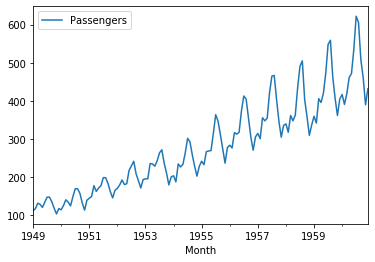

In [20]:
air_passengers.plot()
plt.show()

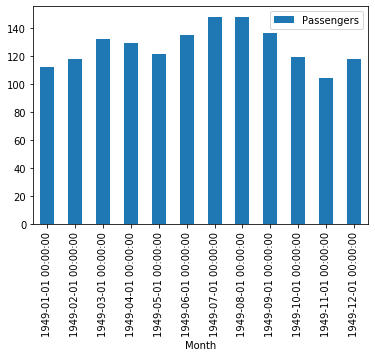

In [21]:
air_passengers['1949'].plot(kind = 'bar')
plt.show()

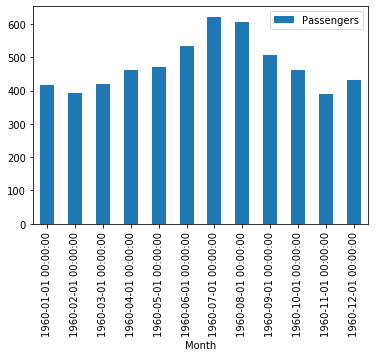

In [22]:
air_passengers['1960'].plot(kind = 'bar')
plt.show()

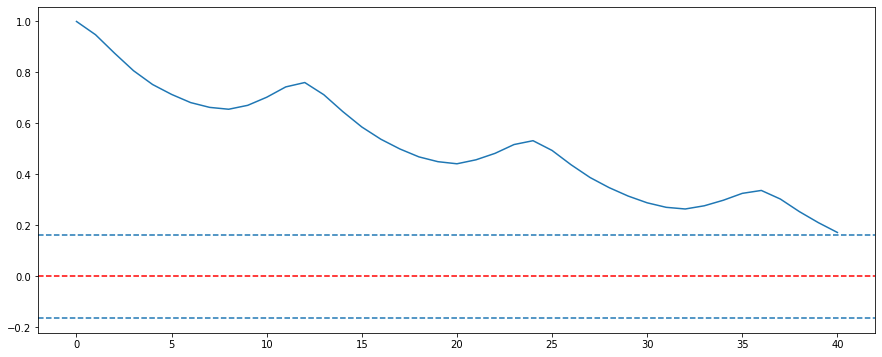

In [23]:
plt.figure(figsize = (15, 6))

acf_result = stattools.acf(air_passengers)
plt.plot(acf_result)
plt.axhline(y = 0,linestyle='--', color = 'red')
plt.axhline(y = -1.96/np.sqrt(len(air_passengers)),linestyle='--')
plt.axhline(y = 1.96/np.sqrt(len(air_passengers)),linestyle='--')

plt.show()

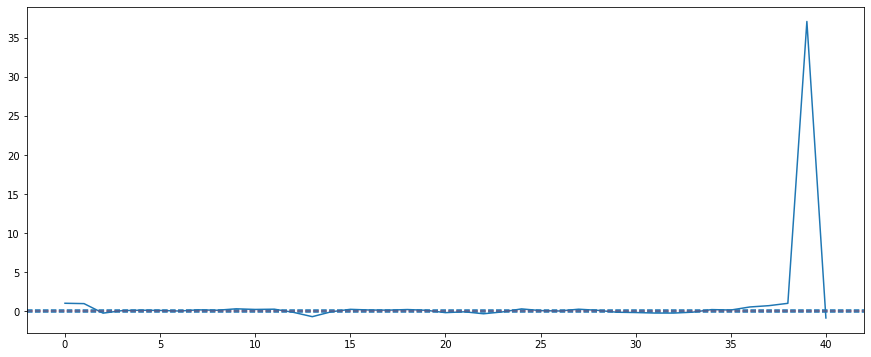

In [50]:
plt.figure(figsize = (15, 6))

pacf_result = stattools.pacf(air_passengers)
plt.plot(pacf_result)
plt.axhline(y = 0,linestyle='--', color = 'red')
plt.axhline(y = -1.96/np.sqrt(len(air_passengers)),linestyle='--')
plt.axhline(y = 1.96/np.sqrt(len(air_passengers)),linestyle='--')

plt.show()

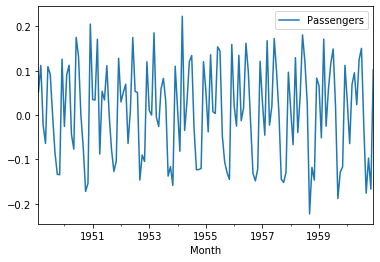

In [24]:
log_air_passengers = np.log(air_passengers)
log_air_passengers_diff = log_air_passengers - log_air_passengers.shift()
log_air_passengers_diff.dropna(inplace = True)
log_air_passengers_diff.plot()

plt.show()

In [36]:
log_air_passengers_diff_2 = np.log(air_passengers)
log_air_passengers_diff_2 = log_air_passengers_diff_2.diff()
log_air_passengers_diff_2.dropna(inplace = True)
log_air_passengers_diff_2 == log_air_passengers_diff

,Passengers
Month,
1949-02-01,True
1949-03-01,True
1949-04-01,True
1949-05-01,True
1949-06-01,True
...,...
1960-08-01,True
1960-09-01,True
1960-10-01,True


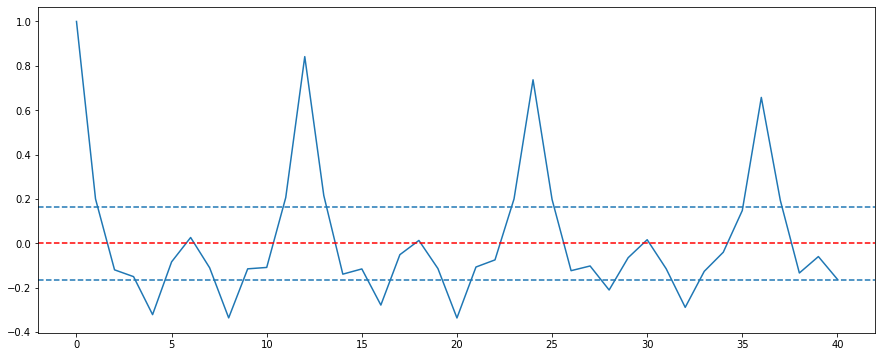

In [37]:
plt.figure(figsize = (15, 6))

acf_result = stattools.acf(log_air_passengers_diff_2)
plt.plot(acf_result)
plt.axhline(y = 0,linestyle='--', color = 'red')
plt.axhline(y = -1.96/np.sqrt(len(log_air_passengers_diff_2)),linestyle='--')
plt.axhline(y = 1.96/np.sqrt(len(log_air_passengers_diff_2)),linestyle='--')

plt.show()

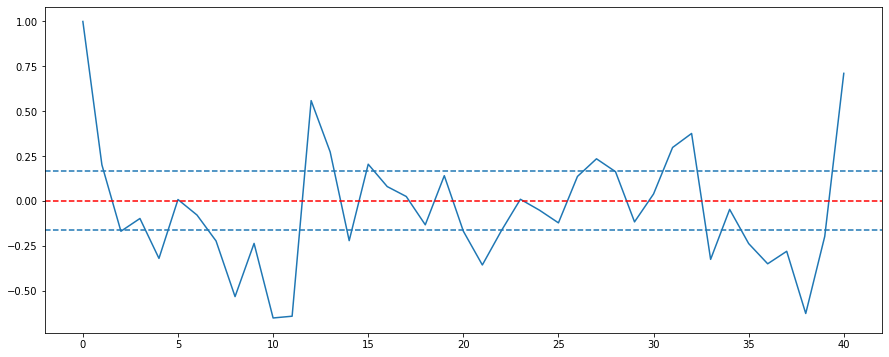

In [51]:
plt.figure(figsize = (15, 6))

pacf_result = stattools.pacf(log_air_passengers_diff_2)
plt.plot(pacf_result)
plt.axhline(y = 0,linestyle='--', color = 'red')
plt.axhline(y = -1.96/np.sqrt(len(log_air_passengers_diff_2)),linestyle='--')
plt.axhline(y = 1.96/np.sqrt(len(log_air_passengers_diff_2)),linestyle='--')

plt.show()

# **Seasonality & Trend**

In [54]:
air_passengers.head(2)

,Passengers
Month,
1949-01-01,112
1949-02-01,118


In [53]:
air_passengers.tail(2)

,Passengers
Month,
1960-11-01,390
1960-12-01,432


In [55]:
air_passengers = air_passengers.to_period()            # compress granuality a lesser dimension

In [56]:
air_passengers.head(2)

,Passengers
Month,
1949-01,112
1949-02,118


In [57]:
air_passengers.tail(2)

,Passengers
Month,
1960-11,390
1960-12,432


In [62]:
air_passengers['1950-06':'1950-06-30']

,Passengers
Month,
1950-06,149


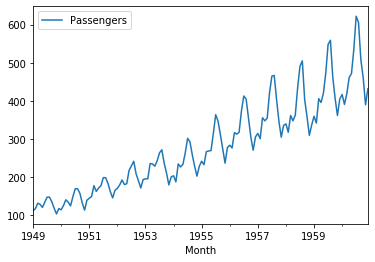

In [63]:
air_passengers.plot()
plt.show()

**First of first when analyze a time-series data:**
**Stationary or not? constant mean, constant variance, autocovariance does not depend on time**

### **Time independent mean? (informal)**

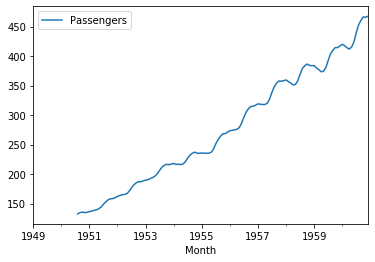

In [64]:
air_passengers.rolling(window = 20).mean().plot()
plt.show()

### **Time independent variance? (informal)**

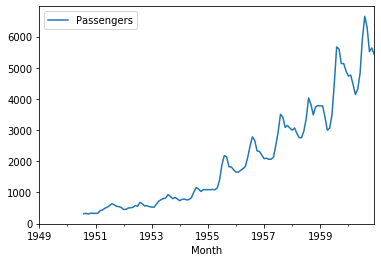

In [68]:
air_passengers.rolling(window = 20).var().plot()
plt.show()

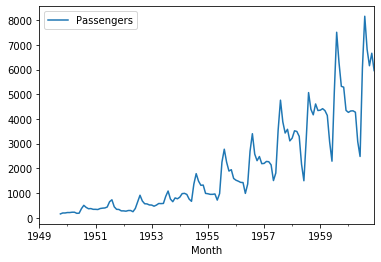

In [69]:
air_passengers.rolling(window = 10).var().plot()
plt.show()

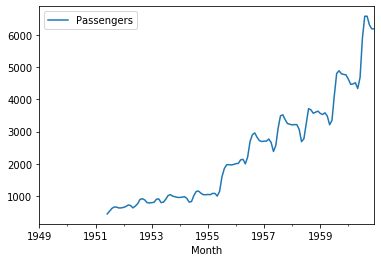

In [70]:
air_passengers.rolling(window = 30).var().plot()
plt.show()

### **Formally testing** 

In [72]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(air_passengers['Passengers'], autolag = 'AIC')
dftest

(0.8153688792060543,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

### **Making non-stationary STATIONARY**

#### **Detrend using log:**

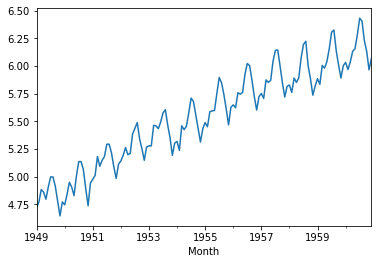

In [75]:
log_passengers = air_passengers['Passengers'].apply(lambda x: np.log(x))
log_passengers.plot()
plt.show()

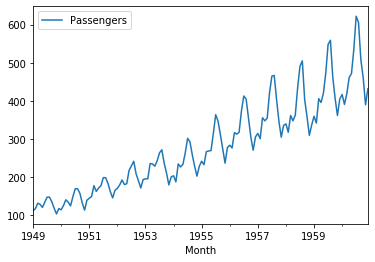

In [77]:
air_passengers.plot()
plt.show()

In [76]:
dftest = adfuller(log_passengers, autolag = 'AIC')
dftest

(-1.7170170891069625,
 0.4223667747703904,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 -445.3990312497209)

##### There is still a trend we need to remove, let's calculate a rolling mean and experiment with window size

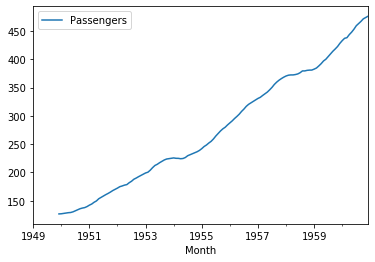

In [79]:
air_passengers.rolling(window = 12).mean().plot()
plt.show()

##### What if we subtract this rolling mean from the original series?

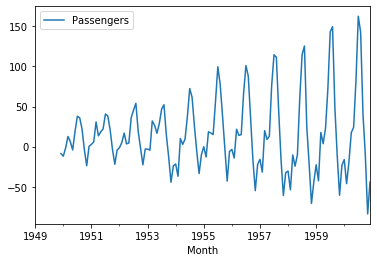

In [80]:
rolling_mean = air_passengers.rolling(window = 12).mean()
passengers_detrended = air_passengers - rolling_mean
passengers_detrended.plot()
plt.show()

##### Detrending after taking the log

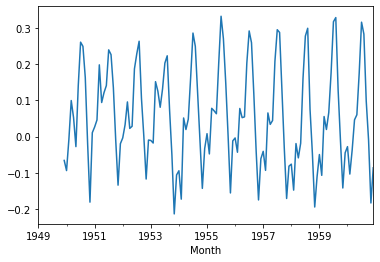

In [81]:
rolling_mean = log_passengers.rolling(window = 12).mean()
passengers_detrended = log_passengers - rolling_mean
passengers_detrended.plot()
plt.show()

#### **Detrend using regression:**

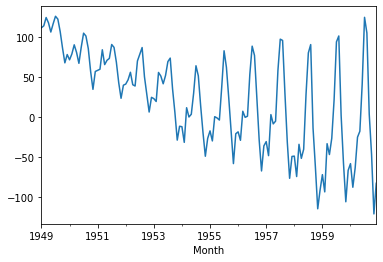

In [84]:
from statsmodels.regression.linear_model import OLS
model = OLS(air_passengers['Passengers'].values, list(range(len(air_passengers.values))))
result = model.fit()
result.params
fit = pd.Series(result.predict(list(range(len(air_passengers.values)))), index = air_passengers.index)

passengers_detrended = air_passengers['Passengers'] - fit
passengers_detrended.plot()
plt.show()

### **Seasonality**

##### Eliminate both trend and seasonality

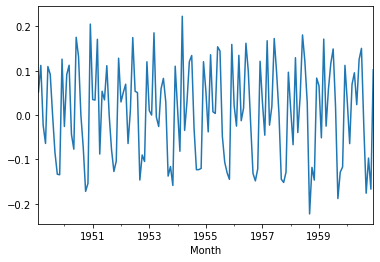

In [87]:
log_passengers_diff = log_passengers - log_passengers.shift()
log_passengers_diff = log_passengers_diff.dropna()
log_passengers_diff.plot()
plt.show()

In [88]:
dftest = adfuller(log_passengers_diff, autolag = 'AIC')
dftest

(-2.7171305983881595,
 0.07112054815085424,
 14,
 128,
 {'1%': -3.4825006939887997,
  '5%': -2.884397984161377,
  '10%': -2.578960197753906},
 -440.35846985568105)

##### **Decomposition**

In [93]:
from statsmodels.tsa.seasonal import seasonal_decompose

log_passengers.interpolate(inplace = True)
decomposition = seasonal_decompose(log_passengers)

In [96]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

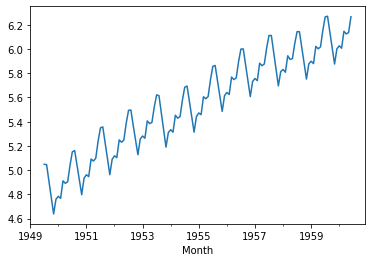

In [100]:
(seasonal+trend).plot()
plt.show()

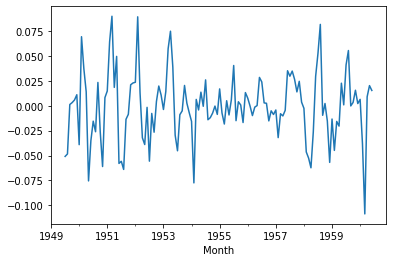

In [102]:
residual.plot()
plt.show()

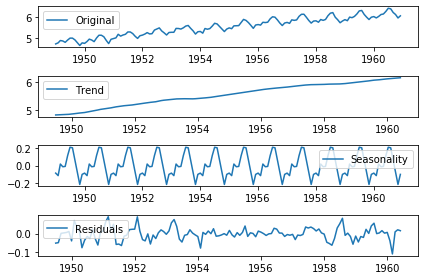

In [104]:
plt.subplot(411)
plt.plot(log_passengers, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# **AR & MA**

### **AR**

In [106]:
def ar1(phi = .9, n = 100, init = 0):
    time_series = [init]
    error = np.random.randn(n)
    for period in range(n):
        time_series.append(error[period] + phi*time_series[-1])
    return pd.Series(time_series[1:], index = range(n))

In [107]:
def ar2(phi1 = .9, phi2 = .8, n = 100, init = 0):
    time_series = [init, init]
    error = np.random.randn(n)
    for period in range(2,n):
        time_series.append(error[period] + phi1*time_series[-1] + phi2*time_series[-2])
    return pd.Series(time_series[1:], index = range(1,n))

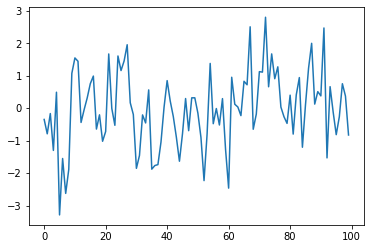

In [112]:
ar1_1 = ar1(phi = .2, n = 100)
ar1_1.plot()
plt.show()

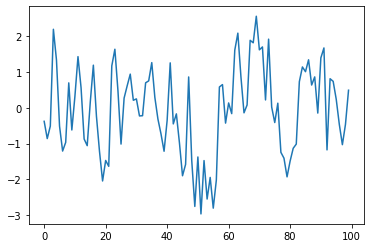

In [113]:
ar1_2 = ar1(phi = .5, n = 100)
ar1_2.plot()
plt.show()

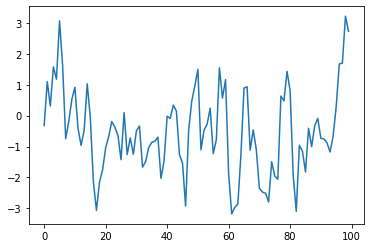

In [115]:
ar1_3 = ar1(phi = .7, n = 100)
ar1_3.plot()
plt.show()

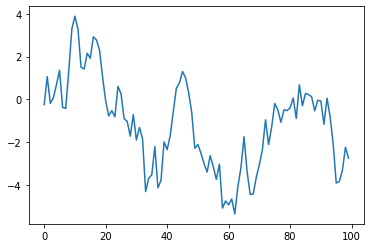

In [116]:
ar1_4 = ar1(phi = .9, n = 100)
ar1_4.plot()
plt.show()

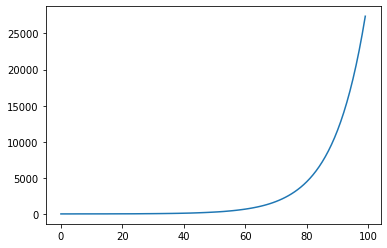

In [119]:
ar1_4 = ar1(phi = 1.1, n = 100)
ar1_4.plot()
plt.show()

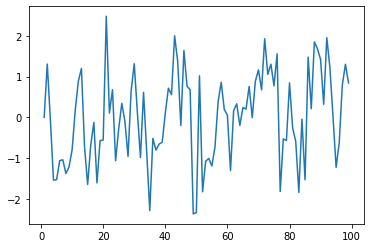

In [122]:
a2_1 = ar2(phi1 = .2, phi2 = .1, n = 100)
a2_1.plot()
plt.show()

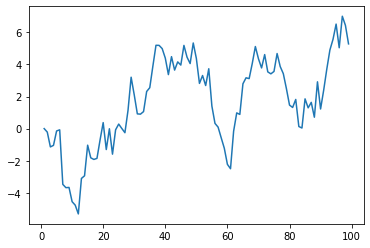

In [126]:
a2_1 = ar2(phi1 = .9, phi2 = .1, n = 100)
a2_1.plot()
plt.show()

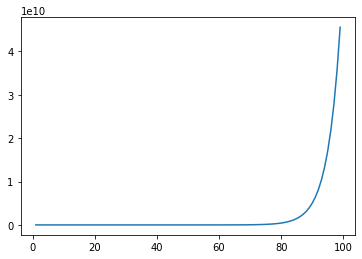

In [124]:
a2_1 = ar2(phi1 = 1.2, phi2 = .1, n = 100)
a2_1.plot()
plt.show()

### **MA**

In [127]:
def ma1(theta = .5, n = 100):
    time_series = []
    error = np.random.randn(n)
    for period in range(1,n):
        time_series.append(error[period] + theta*error[period-1])
    return pd.Series(time_series[1:], index = range(1,n-1))

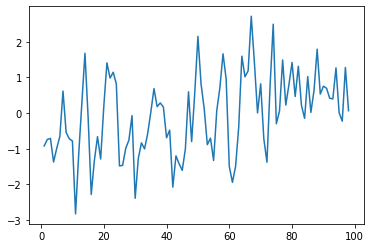

In [130]:
ma_1 = ma1()
ma_1.plot()
plt.show()

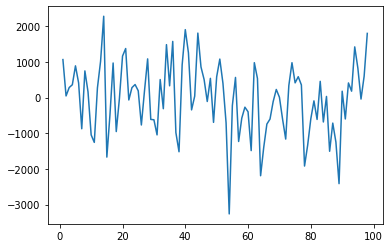

In [132]:
ma_2 = ma1(theta = -1000)
ma_2.plot()
plt.show()

### **AR(1) process**

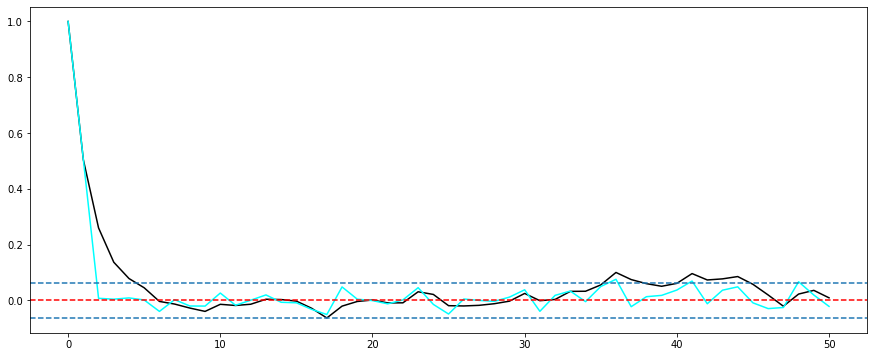

In [147]:
plt.figure(figsize = (15, 6))

a1 = ar1(phi = .5, n = 1000)
a1_acf = stattools.acf(a1, nlags = 50)
a1_pacf = stattools.pacf(a1, nlags = 50)

plt.plot(a1_acf, color = 'black')
plt.plot(a1_pacf, color = 'cyan')

plt.axhline(y = 0,linestyle='--', color = 'red')
plt.axhline(y = -1.96/np.sqrt(len(a1)),linestyle='--')
plt.axhline(y = 1.96/np.sqrt(len(a1)),linestyle='--')

plt.show()

### **MA(1) process**

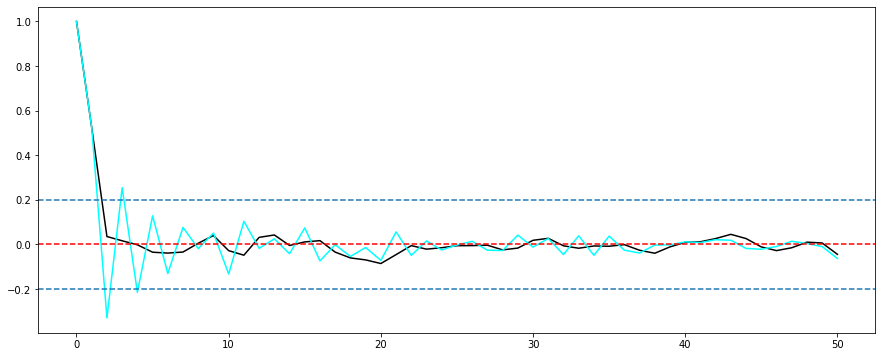

In [148]:
plt.figure(figsize = (15, 6))

ma_1 = ma1(n = 1000, theta = .9)

ma_1_acf = stattools.acf(ma_1, nlags = 50)
ma_1_pacf = stattools.pacf(ma_1, nlags = 50)

plt.plot(ma_1_acf, color = 'black')
plt.plot(ma_1_pacf,color = 'cyan')

plt.axhline(y = 0,linestyle='--', color = 'red')
plt.axhline(y = -1.96/np.sqrt(len(m1)),linestyle='--')
plt.axhline(y = 1.96/np.sqrt(len(m1)),linestyle='--')

plt.show()

# **Forecasting**
1. ARIMA (Auto-Regressive Integrated Moving Average)
2. In following case we investigate a series with dependence among values (more natural)
3. ARIMA is nothing but a linear regression with a few times incorporated within:
   1. The number of Auto-Regressive Terms (p)
   2. The number of Moving Average Terms (q)
   3. The number of differences

In [150]:
air_passengers.head(2)

,Passengers
Month,
1949-01-01,112
1949-02-01,118


In [151]:
log_air_passengers = np.log(air_passengers['Passengers'])
log_air_passengers_diff = log_air_passengers.diff()
log_air_passengers_diff = log_air_passengers_diff.dropna()

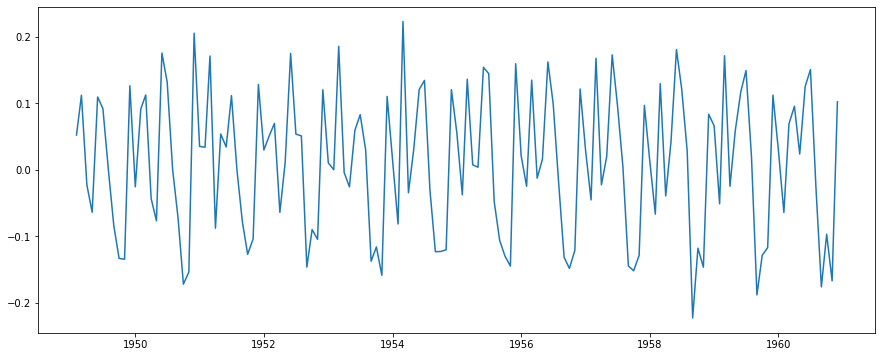

In [153]:
plt.figure(figsize = (15, 6))
plt.plot(log_air_passengers_diff)
plt.show()

In [156]:
log_lag_acf = stattools.acf(log_air_passengers_diff.values, nlags = 36)
log_lag_pacf = stattools.pacf(log_air_passengers_diff.values, nlags = 36)

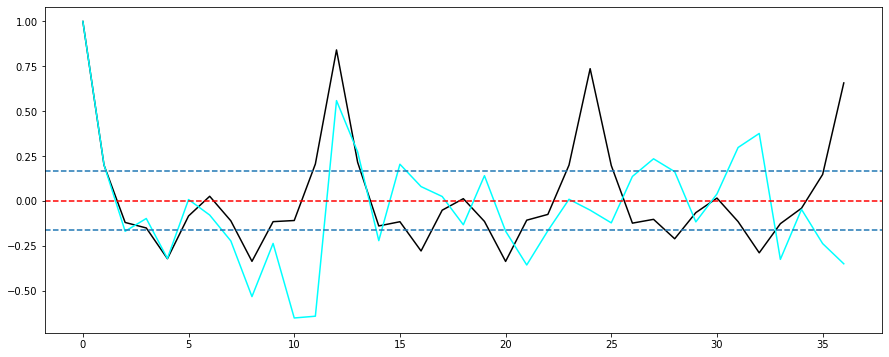

In [159]:
plt.figure(figsize = (15, 6))

plt.plot(log_lag_acf,color = 'black')
plt.plot(log_lag_pacf,color = 'cyan')

plt.axhline(y = 0,linestyle='--', color = 'red')
plt.axhline(y = -1.96/np.sqrt(len(log_air_passengers_diff)),linestyle='--')
plt.axhline(y = 1.96/np.sqrt(len(log_air_passengers_diff)),linestyle='--')

plt.show()

##### **Check where the plot crosses the upper confidence interval for the first time in the ACF. This is 2 and gives us the MA parameter. For an MA process, the ACF drops off quickly.**

##### **Check where the plot crosses the upper confidence interval for the first time in the PACF. This is 2 and gives us the AR parameter. For an AR process the PACF drops off quickly while the ACF does not.**

### **AR model on differenced data:**

In [164]:
model = ARIMA(log_air_passengers, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  

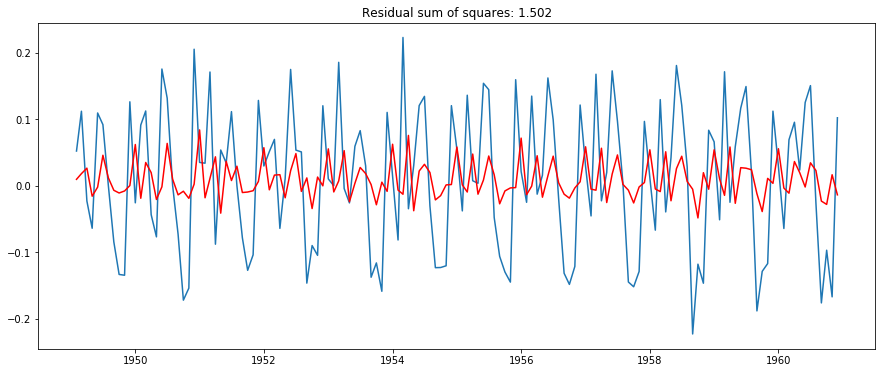

In [165]:
plt.figure(figsize = (15, 6))

plt.plot(log_air_passengers_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('Residual sum of squares: %.3f'% sum((results_AR.fittedvalues-log_air_passengers_diff)**2))

plt.show()

### **MA model on differenced data:**

In [167]:
model = ARIMA(log_air_passengers, order=(0, 1, 2))  
results_MA = model.fit(disp=-1) 

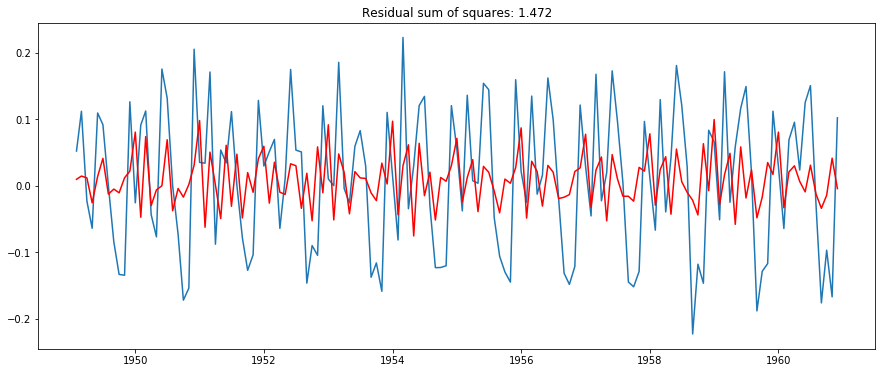

In [168]:
plt.figure(figsize = (15, 6))

plt.plot(log_air_passengers_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('Residual sum of squares: %.3f'% sum((results_MA.fittedvalues-log_air_passengers_diff)**2))

plt.show()

### **ARIMA model on data:**

In [169]:
model = ARIMA(log_air_passengers, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  

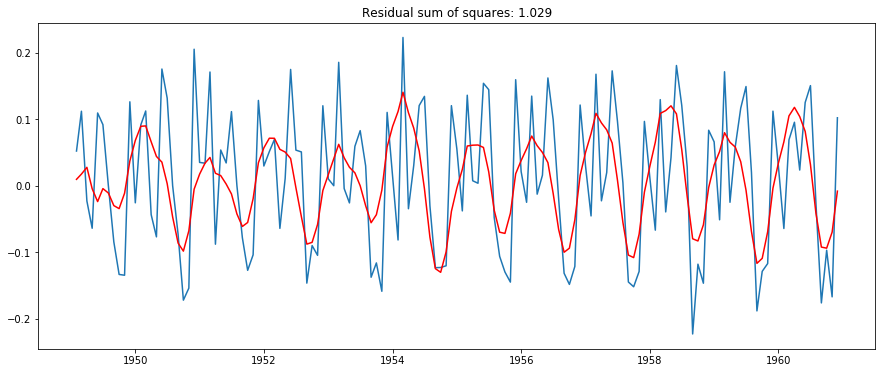

In [170]:
plt.figure(figsize = (15, 6))

plt.plot(log_air_passengers_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('Residual sum of squares: %.3f'% sum((results_ARIMA.fittedvalues-log_air_passengers_diff)**2))

plt.show()

In [171]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_MA_diff = pd.Series(results_MA.fittedvalues, copy=True)
predictions_AR_diff = pd.Series(results_AR.fittedvalues, copy=True)

In [173]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_MA_diff_cumsum = predictions_MA_diff.cumsum()
predictions_AR_diff_cumsum = predictions_AR_diff.cumsum()

In [176]:
predictions_ARIMA_log = pd.Series(log_air_passengers.iloc[0], index=log_air_passengers.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)

predictions_MA_log = pd.Series(log_air_passengers.iloc[0], index=log_air_passengers.index)
predictions_MA_log = predictions_MA_log.add(predictions_MA_diff_cumsum,fill_value=0)

predictions_AR_log = pd.Series(log_air_passengers.iloc[0], index=log_air_passengers.index)
predictions_AR_log = predictions_AR_log.add(predictions_AR_diff_cumsum,fill_value=0)

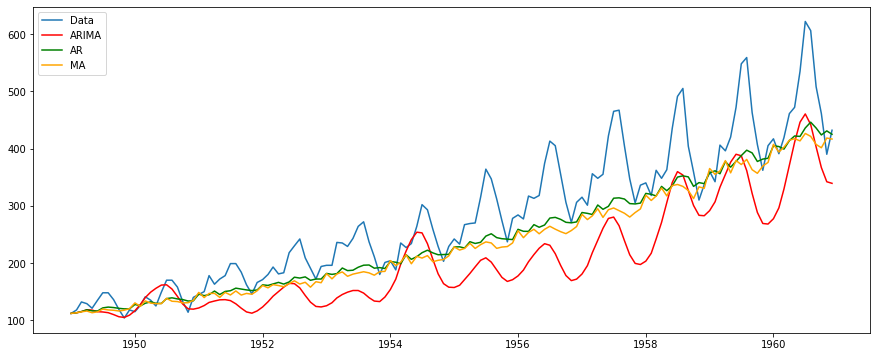

In [178]:
plt.figure(figsize = (15, 6))

predictions_ARIMA = np.exp(predictions_ARIMA_log)
predictions_AR = np.exp(predictions_AR_log)
predictions_MA = np.exp(predictions_MA_log)

air1, = plt.plot(air_passengers)
arima, = plt.plot(predictions_ARIMA, color = 'red')
ar, = plt.plot(predictions_AR, color = 'green')
ma, = plt.plot(predictions_MA, color = 'orange')

plt.legend([air1, arima, ar, ma], ['Data', 'ARIMA', 'AR', 'MA'])

plt.show()

# **Spectral analysis**
**Use Fourier coefficients as a quick way to determine the principal cosine components of a time series**

In [184]:
# courtesy of https://gist.github.com/tartakynov
def fourierExtrapolation(x, n_predict):
    n = x.size
    n_harm = 5                     # number of harmonics in model
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)         # find linear trend in x
    x_notrend = x - p[0] * t        # detrended x
    x_freqdom = np.fft.fft(x_notrend)  # detrended x in frequency domain
    f = np.fft.fftfreq(n)              # frequencies
    indexes = list(range(n))
    # sort indexes by frequency, lower -> higher
    indexes.sort(key = lambda i: np.absolute(f[i]))
 
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig + p[0] * t

In [185]:
x = np.array([669, 592, 664, 1005, 699, 401, 646, 472, 598, 681, 1126, 1260, 
              562, 491, 714, 530, 521, 687, 776, 802, 499, 536, 871, 801, 965, 
              768, 381, 497, 458, 699, 549, 427, 358, 219, 635, 756, 775, 969, 
              598, 630, 649, 722, 835, 812, 724, 966, 778, 584, 697, 737, 777, 
              1059, 1218, 848, 713, 884, 879, 1056, 1273, 1848, 780, 1206, 1404, 
              1444, 1412, 1493, 1576, 1178, 836, 1087, 1101, 1082, 775, 698, 620, 
              651, 731, 906, 958, 1039, 1105, 620, 576, 707, 888, 1052, 1072, 1357, 
              768, 986, 816, 889, 973, 983, 1351, 1266, 1053, 1879, 2085, 2419, 1880, 
              2045, 2212, 1491, 1378, 1524, 1231, 1577, 2459, 1848, 1506, 1589, 1386, 
              1111, 1180, 1075, 1595, 1309, 2092, 1846, 2321, 2036, 3587, 1637, 1416, 
              1432, 1110, 1135, 1233, 1439, 894, 628, 967, 1176, 1069, 1193, 1771, 1199, 
              888, 1155, 1254, 1403, 1502, 1692, 1187, 1110, 1382, 1808, 2039, 1810, 1819, 
              1408, 803, 1568, 1227, 1270, 1268, 1535, 873, 1006, 1328, 1733, 1352, 1906, 
              2029, 1734, 1314, 1810, 1540, 1958, 1420, 1530, 1126, 721, 771, 874, 997, 
              1186, 1415, 973, 1146, 1147, 1079, 3854, 3407, 2257, 1200, 734, 1051, 1030, 
              1370, 2422, 1531, 1062, 530, 1030, 1061, 1249, 2080, 2251, 1190, 756, 1161, 
              1053, 1063, 932, 1604, 1130, 744, 930, 948, 1107, 1161, 1194, 1366, 1155, 
              785, 602, 903, 1142, 1410, 1256, 742, 985, 1037, 1067, 1196, 1412, 1127, 779, 
              911, 989, 946, 888, 1349, 1124, 761, 994, 1068, 971, 1157, 1558, 1223, 782, 
              2790, 1835, 1444, 1098, 1399, 1255, 950, 1110, 1345, 1224, 1092, 1446, 1210, 
              1122, 1259, 1181, 1035, 1325, 1481, 1278, 769, 911, 876, 877, 950, 1383, 980, 
              705, 888, 877, 638, 1065, 1142, 1090, 1316, 1270, 1048, 1256, 1009, 1175, 1176, 
              870, 856, 860])

n_predict = 100
extrapolation = fourierExtrapolation(x, n_predict)

In [187]:
len(x)

288

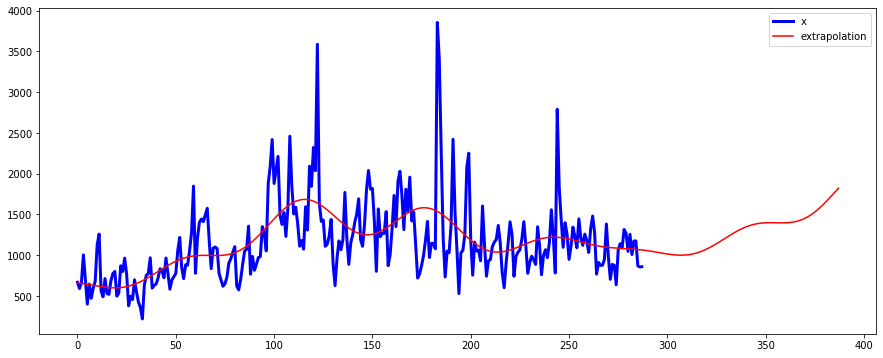

In [186]:
plt.figure(figsize = (15, 6))

plt.plot(np.arange(0, x.size), x, 'b', label = 'x', linewidth = 3)
plt.plot(np.arange(0, extrapolation.size), extrapolation, 'r', label = 'extrapolation')
plt.legend()

plt.show()

In [188]:
x = np.array(air_passengers['Passengers'].values)

n_predict = 300
extrapolation = fourierExtrapolation(x, n_predict)

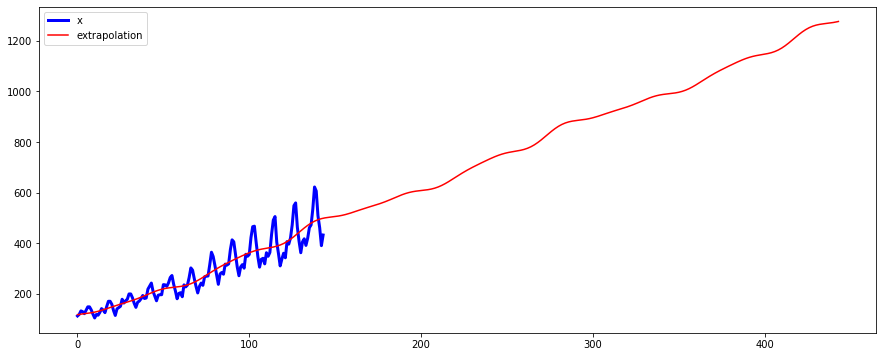

In [189]:
plt.figure(figsize = (15, 6))

plt.plot(np.arange(0, x.size), x, 'b', label = 'x', linewidth = 3)
plt.plot(np.arange(0, extrapolation.size), extrapolation, 'r', label = 'extrapolation')
plt.legend()

plt.show()